# Libraries and Data

In [ ]:
# Install the chronos library and time series database
!pip install -q git+https://github.com/amazon-science/chronos-forecasting.git
!pip install -q tsdb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 95.3 MB/s eta 0:00:00


In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import ParameterGrid

# import tsdb
# from chronos import ChronosPipeline
# from datetime  import datetime
# import torch

In [ ]:
# Load the Data from TSDB library
# Air quality data of sites in beijing
df = pd.DataFrame(tsdb.load('beijing_multisite_air_quality')['X'])
df.head()

In [ ]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

In [ ]:
# Rename the 'TEMP' column as 'y'
df = df.rename(columns = {'TEMP': 'y'})
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,y,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [ ]:
# Zooming in on Wanliu
df = df.loc[df["station"] == "Wanliu"]["y"]
df.head()

datetime
2013-03-01 00:00:00   -0.7
2013-03-01 01:00:00   -1.1
2013-03-01 02:00:00   -1.1
2013-03-01 03:00:00   -1.4
2013-03-01 04:00:00   -2.0
Name: y, dtype: float64

In [ ]:
# Setting the Frequency
df = df.asfreq("H")

# Exploratory Data Analysis

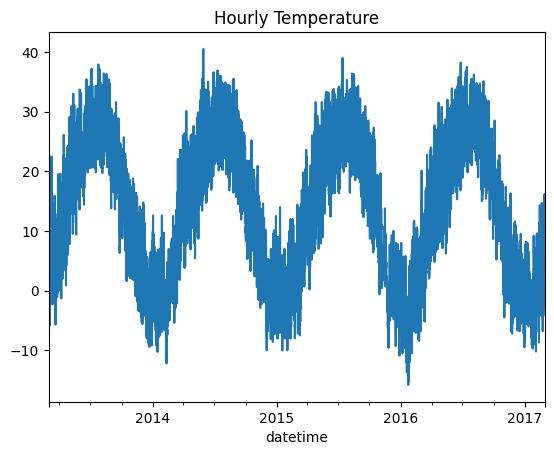

In [ ]:
# Plot the hourly temperature data
df.plot(title = 'Hourly Temperature')
plt.show()

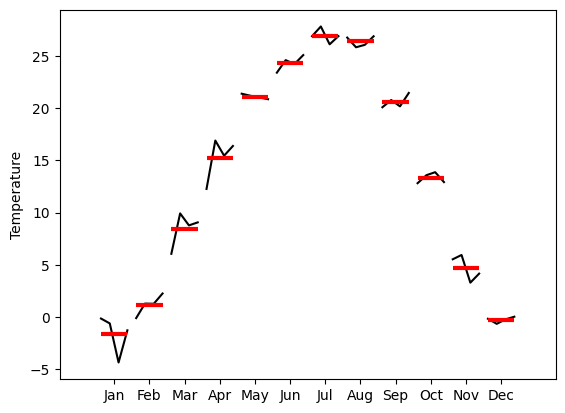

In [ ]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of temperature
month_plot(df.resample('M').mean(),
           ylabel = 'Temperature')
plt.show()

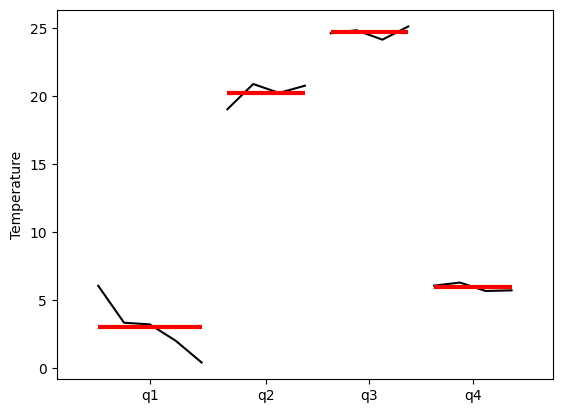

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of temperature
quarter_plot(df.resample('Q').mean(),
           ylabel = 'Temperature')
plt.show()

# Amazon Chronos Model